<a href="https://colab.research.google.com/github/Tony1222/WQD7006_Group7/blob/main/Machine%20Learning%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

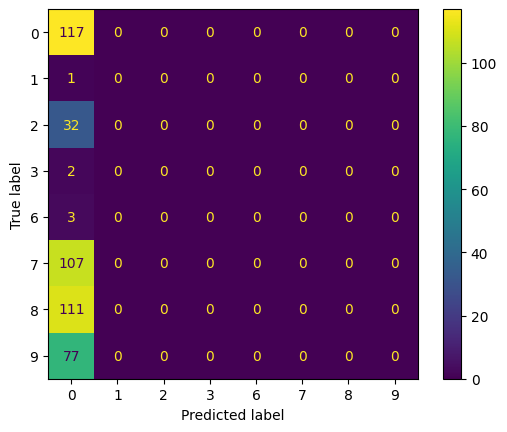

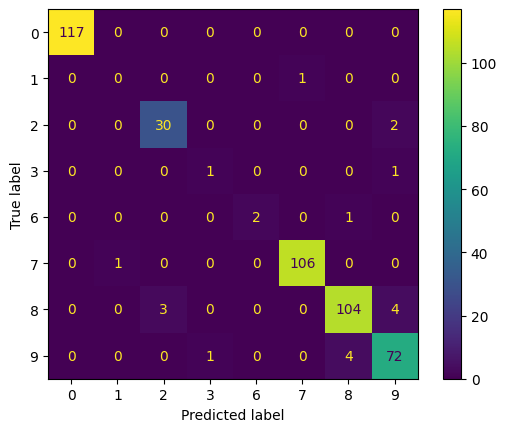

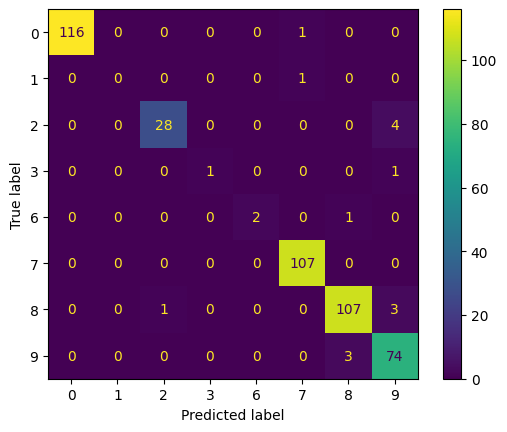

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression:
Accuracy = 0.26
Precision = 0.06760000000000001
Recall = 0.26
F1-score = 0.10730158730158731

Decision Tree:
Accuracy = 0.96
Precision = 0.9603919581367033
Recall = 0.96
F1-score = 0.9599129759129759

Random Forest:
Accuracy = 0.9666666666666667
Precision = 0.9653801196664292
Recall = 0.9666666666666667
F1-score = 0.9650898929444811


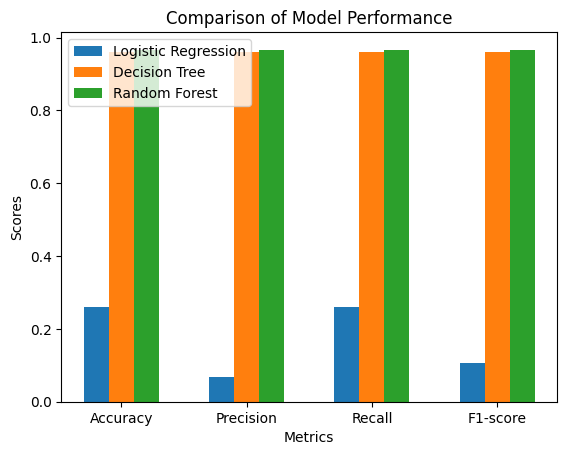

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/processed_BHD1.csv'
data = pd.read_csv(file_path)

# Features and target variable
X = data.drop(columns=['address', 'label', 'label_encoded'])
y = data['label_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_estimators=100)

# Train the models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)
rand_forest_pred = rand_forest.predict(X_test)


# Plot Confusion Matrix for Logistic Regression
disp = ConfusionMatrixDisplay.from_predictions(y_test, log_reg_pred)
plt.show()

# Plot Confusion Matrix for Decision Tree
disp = ConfusionMatrixDisplay.from_predictions(y_test, dec_tree_pred)
plt.show()

# Plot Confusion Matrix for Random Forest
disp = ConfusionMatrixDisplay.from_predictions(y_test, rand_forest_pred)
plt.show()

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, log_reg_pred)
dec_tree_metrics = evaluate_model(y_test, dec_tree_pred)
rand_forest_metrics = evaluate_model(y_test, rand_forest_pred)


# Print the metrics
print(f"Logistic Regression:\nAccuracy = {log_reg_metrics[0]}\nPrecision = {log_reg_metrics[1]}\nRecall = {log_reg_metrics[2]}\nF1-score = {log_reg_metrics[3]}")
print(f"\nDecision Tree:\nAccuracy = {dec_tree_metrics[0]}\nPrecision = {dec_tree_metrics[1]}\nRecall = {dec_tree_metrics[2]}\nF1-score = {dec_tree_metrics[3]}")
print(f"\nRandom Forest:\nAccuracy = {rand_forest_metrics[0]}\nPrecision = {rand_forest_metrics[1]}\nRecall = {rand_forest_metrics[2]}\nF1-score = {rand_forest_metrics[3]}")


# Define the metrics and model names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
log_reg_scores = [log_reg_metrics[0], log_reg_metrics[1], log_reg_metrics[2], log_reg_metrics[3]]
dec_tree_scores = [dec_tree_metrics[0], dec_tree_metrics[1], dec_tree_metrics[2], dec_tree_metrics[3]]
rand_forest_scores = [rand_forest_metrics[0], rand_forest_metrics[1], rand_forest_metrics[2], rand_forest_metrics[3]]

# Plot the metrics
x = range(len(metrics))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x, log_reg_scores, width, label='Logistic Regression')
ax.bar([p + width for p in x], dec_tree_scores, width, label='Decision Tree')
ax.bar([p + width * 2 for p in x], rand_forest_scores, width, label='Random Forest')

# Set the labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()